In [1]:
import pandas as pd
import numpy as np
#from pandas import factorize
from random import choices
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv('Zinj.csv')

In [3]:
ds

,Unnamed: 0,longitude,latitude,buildingType
0,0,7.737361,48.614862,single_house
1,1,7.728645,48.633358,single_house
2,2,7.728844,48.633018,single_house
3,3,7.729358,48.616688,garage
4,4,7.729743,48.632626,single_house
...,...,...,...,...
3366,3366,7.768556,48.597937,commercial_building
3367,3367,7.781501,48.586944,single_house
3368,3368,7.781619,48.587025,single_house
3369,3369,7.763797,48.597398,single_house


In [4]:
lonG = ds[['longitude']]
latI = ds[['latitude']]
print(lonG)

      longitude
0      7.737361
1      7.728645
2      7.728844
3      7.729358
4      7.729743
...         ...
3366   7.768556
3367   7.781501
3368   7.781619
3369   7.763797
3370   7.763898

[3371 rows x 1 columns]


In [5]:
lonG_max = lonG.max()
lonG_min = lonG.min()
latI_max = latI.max()
latI_min = latI.min()
#print(lonG_max)
#print(lonG_max - lonG_min)

In [6]:
new_lonG = np.linspace(lonG_min, lonG_max, 3371, endpoint = True)
new_latI = np.linspace(latI_min, latI_max, 3371, endpoint = True)
print(new_lonG[100])
np.random.shuffle(new_lonG)
#np.random.shuffle(new_latI)
new_lonG = new_lonG.tolist()
new_latI = new_latI.tolist()
print(new_lonG[100])

[7.6708547]
[7.775007055554317]


In [7]:
btypes = ds.iloc[:,3]

In [8]:
btypes = btypes.factorize()

In [9]:
counts = ds['buildingType'].value_counts()

In [10]:
print(counts)

single_house           2339
collective_house        425
commercial_building     373
garage                  132
light_building           88
school                   14
Name: buildingType, dtype: int64


In [11]:
print(btypes)

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64), Index(['single_house', 'garage', 'commercial_building', 'light_building',
       'collective_house', 'school'],
      dtype='object'))


In [12]:
btypes_l = ['single_house', 'garage', 'commercial_building', 'light_building',
       'collective_house', 'school']
tot_sum = sum(counts)

In [13]:
counts[:] = [x/tot_sum for x in counts]
print(counts)

single_house           0.693859
collective_house       0.126075
commercial_building    0.110650
garage                 0.039158
light_building         0.026105
school                 0.004153
Name: buildingType, dtype: float64


In [14]:
new_bT = choices(btypes_l, counts, k=3371)

In [29]:
#print(new_bT)

In [16]:
trash, newBtypes = pd.factorize(new_bT)

In [17]:
print(newBtypes)

['single_house' 'commercial_building' 'garage' 'collective_house'
 'light_building' 'school']


In [18]:
ds_new = pd.DataFrame({'longitude': new_lonG, 'latitude' : new_latI, 'buildingType': new_bT})

In [19]:
ds_new.head()

,longitude,latitude,buildingType
0,[7.698610064858517],[48.58095654924354],single_house
1,[7.753806977807605],[48.580972836748174],single_house
2,[7.749971437425798],[48.58098912425282],single_house
3,[7.6914620123287865],[48.58100541175745],single_house
4,[7.721971992638611],[48.58102169926209],single_house


In [20]:
print(pd.factorize(ds_new['buildingType']))

(array([0, 0, 0, ..., 0, 0, 3], dtype=int64), Index(['single_house', 'commercial_building', 'garage', 'collective_house',
       'light_building', 'school'],
      dtype='object'))


In [21]:
#ds_new.to_csv('Z_DataSet.csv')

In [22]:
#ds_test = pd.read_csv('Z_DataSet.csv')
ds_test = ds_new.iloc[0:500,:]
ds_test_lat = ds_test['latitude'].tolist()
ds_test_lon = ds_test['longitude'].tolist()
#print(ds_test_lon)

In [23]:
print(ds_test['longitude'])

0       [7.698610064858517]
1       [7.753806977807605]
2       [7.749971437425798]
3      [7.6914620123287865]
4       [7.721971992638611]
               ...         
495     [7.737174679970135]
496    [7.6691461410164585]
497     [7.739999032433102]
498     [7.714928545755657]
499     [7.725912138667194]
Name: longitude, Length: 500, dtype: object


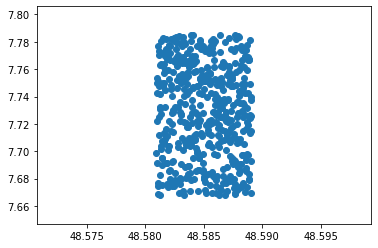

In [32]:
#testing points

ax1 = plt.scatter(ds_test['latitude'].tolist(), ds_test['longitude'].tolist())

In [33]:
ds_new.to_csv('Z_DataSet_new.csv')

In [34]:
df = pd.read_csv('Z_DataSet_new.csv')

In [35]:
df = df.iloc[0:500,:]

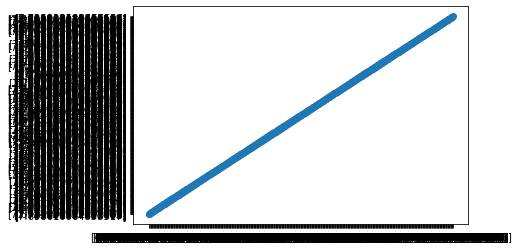

In [36]:
ax2 = plt.scatter(df['latitude'].tolist(), df['longitude'].tolist())